In [1]:
cd /mnt/sda/otani/Experiments/moment_retrieval/

/mnt/sda/otani/Experiments/moment_retrieval


In [2]:
import pickle as pkl
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##########Charades##########
shuffle
41.9% samples remain same
41.9% samples remain same or slight change
random
20.2% samples remain same
20.2% samples remain same or slight change
##########ActivityNet##########
shuffle
67.9% samples remain same
87.3% samples remain same or slight change
random
47.2% samples remain same
70.3% samples remain same or slight change


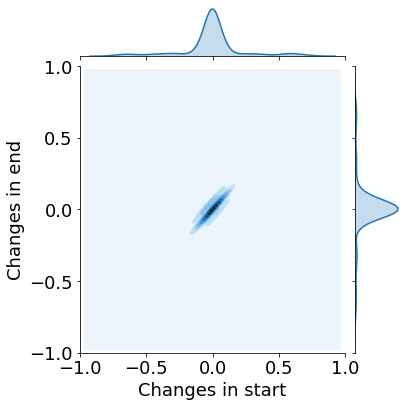

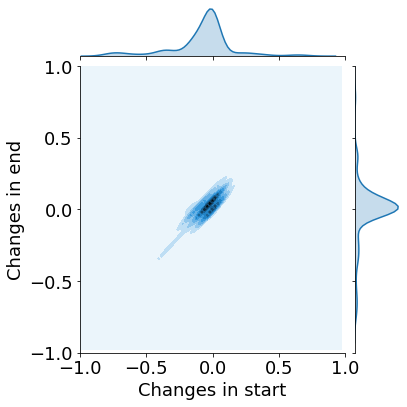

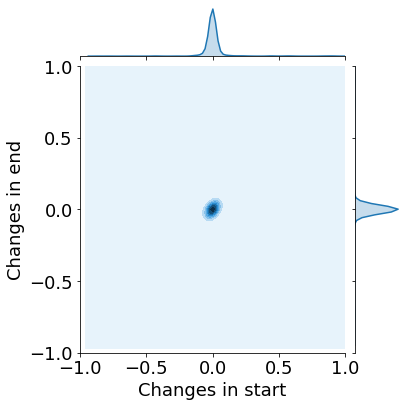

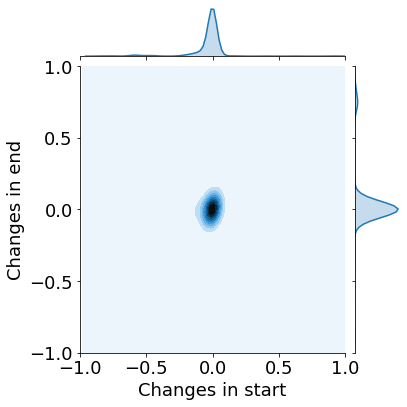

In [9]:
plt.rcParams["font.size"] = 18
def check_diff_2DTAN():
    for dataset_name in ["Charades", "ActivityNet"]:
        print(f"##########{dataset_name}##########")
        if dataset_name == "Charades":
            model_name = 'TAN_vgg_rgb_test.pkl'
        else:
            model_name = 'TAN_c3d_test.pkl'

        shuffle_predictions = pkl.load(open(f"/home/otani_mayu/3TDisk/Experiments/2D-TAN/results/shuffle/{dataset_name}/{model_name}", "rb"))
        random_predictions = pkl.load(open(f"/home/otani_mayu/3TDisk/Experiments/2D-TAN/results/random/{dataset_name}/{model_name}", "rb"))
        original_predictions = pkl.load(open(f"/home/otani_mayu/3TDisk/Experiments/2D-TAN/results/{dataset_name}/{model_name}", "rb"))

        sh_pred_arr = []
        rand_pred_arr = []
        org_pred_arr = []

        for sh_pred, rand_pred, org_pred in zip(shuffle_predictions, random_predictions, original_predictions):
            sh_pred_arr.append(sh_pred[1][0])
            rand_pred_arr.append(rand_pred[1][0])
            org_pred_arr.append(org_pred[1][0])
        sh_pred_arr = np.asarray(sh_pred_arr)
        sh_pred_arr = sh_pred_arr[:, :2] / sh_pred_arr[:, -1][:,None]
        rand_pred_arr = np.asarray(rand_pred_arr)
        rand_pred_arr = rand_pred_arr[:, :2] / rand_pred_arr[:, -1][:,None]
        org_pred_arr = np.asarray(org_pred_arr)
        org_pred_arr = org_pred_arr[:, :2] / org_pred_arr[:, -1][:,None]
        shuffle_diff = org_pred_arr - sh_pred_arr
        rand_diff = org_pred_arr - rand_pred_arr

        for label, diff in zip(
            ['shuffle', 'random'],
            [shuffle_diff, rand_diff]
        ):
            print(label)
            remain_same = (diff == 0.0).sum(axis=1) == 2
            print(f"{remain_same.sum() / remain_same.size*100:.1f}% samples remain same")

            is_slight_change = np.abs(diff).sum(axis=1) < 0.05
            print(f"{is_slight_change.sum() / is_slight_change.size*100:.1f}% samples remain same or slight change")
            
            sample_idx = np.random.permutation(len(diff))[:1000]
            diff_data = pd.DataFrame({"Changes in start": diff[sample_idx,0],
                                     "Changes in end": diff[sample_idx,1]})
            sns.jointplot("Changes in start", "Changes in end", kind="kde", data=diff_data, xlim=(-1,1), ylim=(-1,1))
            plt.savefig(f"reports/figures/output_changes/2D-TAN({dataset_name})_{label}.pdf", bbox_inches="tight")
check_diff_2DTAN()

##########charade##########
0.0% samples remain same
11.1% samples remain same or slight change
##########activitynet##########
0.2% samples remain same
43.9% samples remain same or slight change


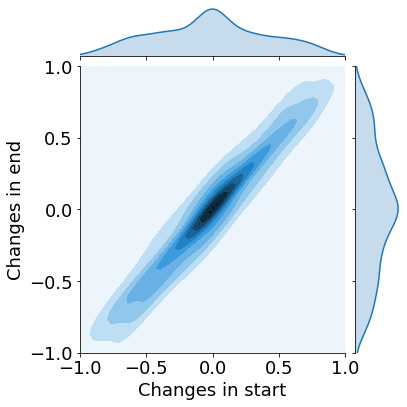

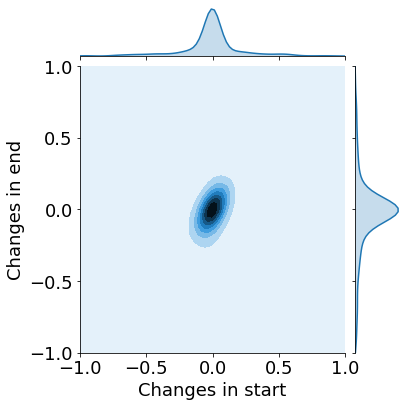

In [8]:
def check_diff_SCDM():
    for dataset_name in ["charade", "activitynet"]:
        print(f"##########{dataset_name}##########")
        shuffle_predictions = pkl.load(open(f"reports/figure_src/results/{dataset_name}/scdm_shuffle.pkl", "rb"))
        original_predictions = pkl.load(open(f"reports/figure_src/results/{dataset_name}/scdm.pkl", "rb"))

        sh_pred_arr = []
        rand_pred_arr = []
        org_pred_arr = []

        for sh_pred, org_pred in zip(shuffle_predictions, original_predictions):
            if sh_pred[1] is not None:
                sh_pred_arr.append(sh_pred[1][0])
                org_pred_arr.append(org_pred[1][0])
        sh_pred_arr = np.asarray(sh_pred_arr)
        sh_pred_arr = sh_pred_arr[:, :2] / sh_pred_arr[:, -1][:,None]
        org_pred_arr = np.asarray(org_pred_arr)
        org_pred_arr = org_pred_arr[:, :2] / org_pred_arr[:, -1][:,None]
        diff = org_pred_arr - sh_pred_arr

        remain_same = (diff == 0.0).sum(axis=1) == 2
        print(f"{remain_same.sum() / remain_same.size*100:.1f}% samples remain same")
        is_slight_change = np.abs(diff).sum(axis=1) < 0.1
        print(f"{is_slight_change.sum() / is_slight_change.size*100:.1f}% samples remain same or slight change")
        
        sample_idx = np.random.permutation(len(diff))[:1000]
        diff_data = pd.DataFrame({"Changes in start": diff[sample_idx,0],
                                 "Changes in end": diff[sample_idx,1]})
        sns.jointplot("Changes in start", "Changes in end", kind="kde", data=diff_data, xlim=(-1,1), ylim=(-1,1))
        plt.savefig(f"reports/figures/output_changes/CSDM({dataset_name}).pdf", bbox_inches="tight")
check_diff_SCDM()

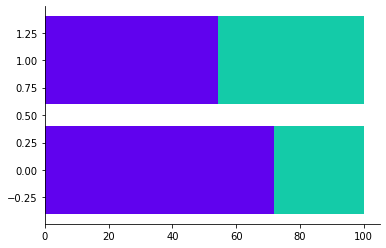

In [20]:
plt.barh([1,0], [100, 100], color="#14cba8")
plt.barh([1,0], [54.4, 72.0], color="#6002ee")
plt.barh([1,0], [0, 0.2], color="red")
sns.despine()